In [ ]:
# Import necessary libraries
import pandas as pd  # For data manipulation//table
import numpy as np  # For math and numerical operations
import seaborn as sns  # For visualizations//chart
import matplotlib.pyplot as plt  # For plotting
#data preparation tools
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler#words to num,number betwen 0-1,center around zero
from sklearn.decomposition import PCA#keep important info
from sklearn.feature_selection import VarianceThreshold#remove column but not mutch
from sklearn.model_selection import train_test_split



In [ ]:
url ="https://raw.githubusercontent.com/kaveeshaadithya03/AIML/refs/heads/main/Online_Dating_Behavior_Dataset.csv"
data = pd.read_csv(url, encoding='latin-1')
df = pd.DataFrame(data)
data.head()

,Gender,PurchasedVIP,Income,Children,Age,Attractiveness,Matches
0,0,1,51777,3,47,5,70
1,1,0,36646,0,42,7,130
2,0,0,53801,1,25,5,0
3,0,0,56105,0,35,8,0
4,0,0,55597,1,36,6,0


In [ ]:
df = pd.DataFrame(data)

# Handle missing values
print("Missing values before handling:") #print message
print(df.isnull().sum()) #how many miss values

# Fill missing numerical columns with mean
df.fillna(df.mean(), inplace=True)

# Fill missing categorical columns with mode
df.fillna(df.mode().iloc[0], inplace=True)

# Verify if all missing data is handled
print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values before handling:
Gender            0
PurchasedVIP      0
Income            0
Children          0
Age               0
Attractiveness    0
Matches           0
dtype: int64

Missing values after handling:
Gender            0
PurchasedVIP      0
Income            0
Children          0
Age               0
Attractiveness    0
Matches           0
dtype: int64


     Gender  PurchasedVIP  Income  Children  Age  Attractiveness  Matches  \
0         0             1   51777         3   47               5       70   
1         1             0   36646         0   42               7      130   
2         0             0   53801         1   25               5        0   
3         0             0   56105         0   35               8        0   
4         0             0   55597         1   36               6        0   
..      ...           ...     ...       ...  ...             ...      ...   
995       0             0   36799         0   28               1        0   
996       0             1   43882         2   46               9       70   
997       1             0   49629         2   49               6      120   
998       1             0   45706         1   22               8      140   
999       0             0   43075         0   43               3        0   

     Gender_encoded  
0                 0  
1                 1  
2        

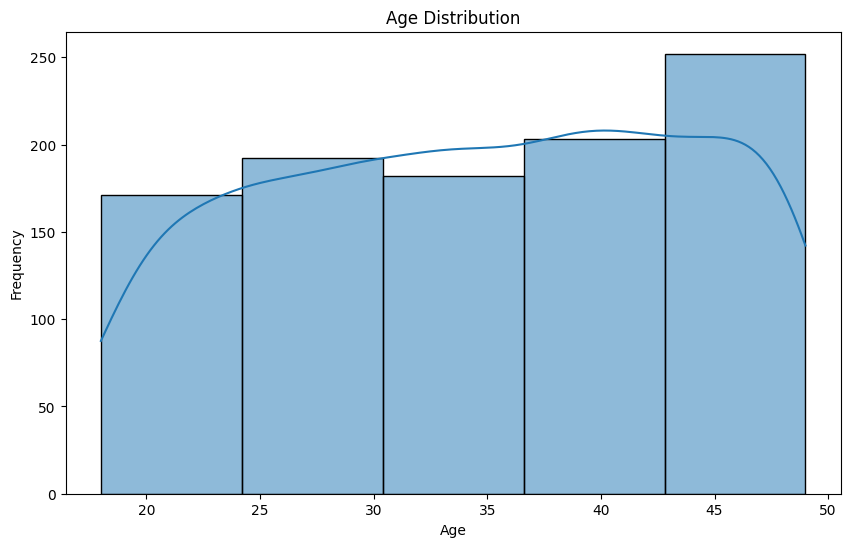

In [ ]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding
df['Gender_encoded'] = label_encoder.fit_transform(df['Gender'])

# Display the dataframe with the encoded column
print(df)

# **EDA 1: Histogram for Age Distribution (Member 1)**
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], kde=True, bins=5)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


     Gender  PurchasedVIP  Income  Children  Age  Attractiveness  Matches  \
0         0             1   51777         3   47               5       70   
1         1             0   36646         0   42               7      130   
2         0             0   53801         1   25               5        0   
3         0             0   56105         0   35               8        0   
4         0             0   55597         1   36               6        0   
..      ...           ...     ...       ...  ...             ...      ...   
995       0             0   36799         0   28               1        0   
996       0             1   43882         2   46               9       70   
997       1             0   49629         2   49               6      120   
998       1             0   45706         1   22               8      140   
999       0             0   43075         0   43               3        0   

     Gender_encoded  
0                 0  
1                 1  
2        

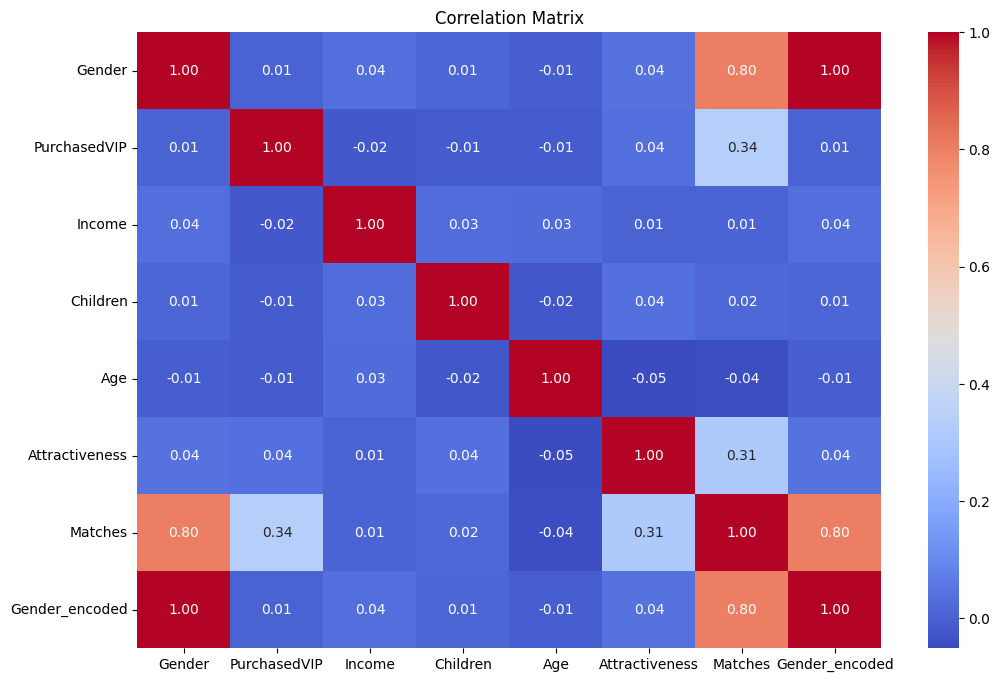

In [ ]:
# Apply One-Hot Encoding
df_encoded = pd.get_dummies(df)  # Automatically encodes all categorical columns
print(df_encoded)

# Create a correlation matrix heatmap
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

     Gender  PurchasedVIP  Income  Children  Age  Attractiveness  Matches  \
0         0             1   51777         3   47               5       70   
1         1             0   36646         0   42               7      130   
2         0             0   53801         1   25               5        0   
3         0             0   56105         0   35               8        0   
4         0             0   55597         1   36               6        0   
..      ...           ...     ...       ...  ...             ...      ...   
995       0             0   36799         0   28               1        0   
996       0             1   43882         2   46               9       70   
997       1             0   49629         2   49               6      120   
998       1             0   45706         1   22               8      140   
999       0             0   43075         0   43               3        0   

     Gender_encoded  
0                 0  
1                 1  
2        

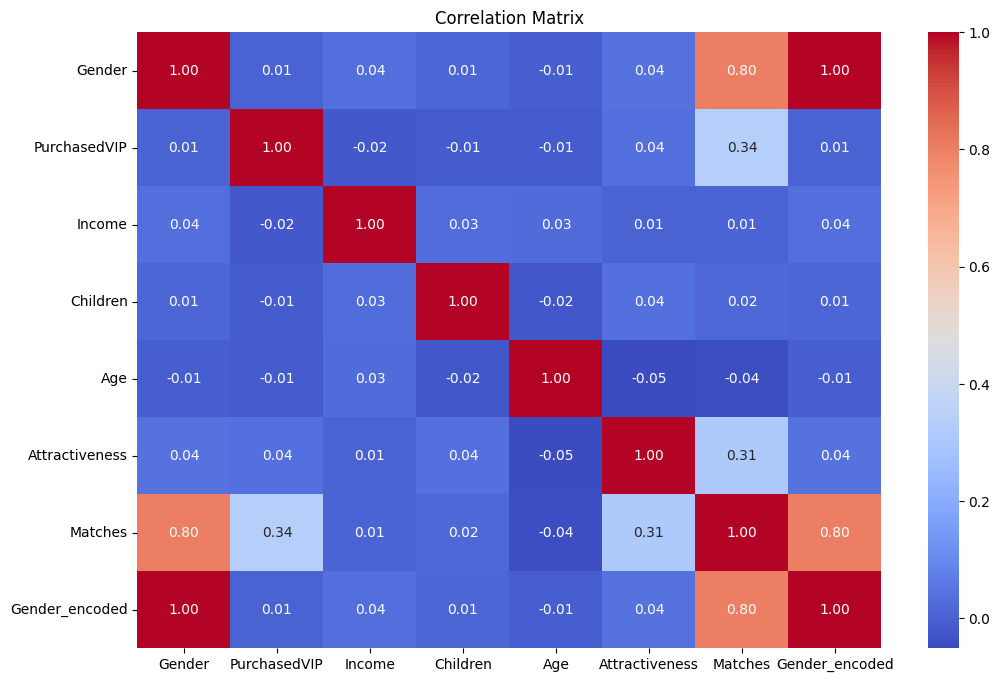

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Determine the outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]

# Display the dataframe without outliers
print(df_no_outliers)

# Create a correlation matrix heatmap
correlation_matrix = df_no_outliers.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()



     Gender  PurchasedVIP  Income  Children  Age  Attractiveness  Matches  \
0         0             1   51777         3   47               5       70   
1         1             0   36646         0   42               7      130   
2         0             0   53801         1   25               5        0   
3         0             0   56105         0   35               8        0   
4         0             0   55597         1   36               6        0   
..      ...           ...     ...       ...  ...             ...      ...   
995       0             0   36799         0   28               1        0   
996       0             1   43882         2   46               9       70   
997       1             0   49629         2   49               6      120   
998       1             0   45706         1   22               8      140   
999       0             0   43075         0   43               3        0   

     Gender_encoded  Age_normalized  Age_standardized  Age_minmax  \
0     

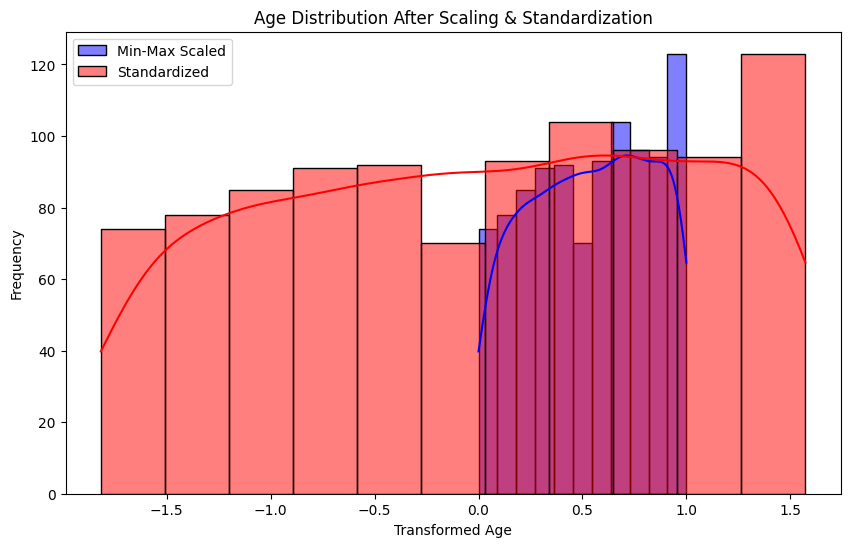

In [ ]:
# Min-Max Scaling
scaler = MinMaxScaler()
df_no_outliers['Age_minmax'] = scaler.fit_transform(df_no_outliers[['Age']])

# Standardization (Z-score)
std_scaler = StandardScaler()
df_no_outliers['Age_standard'] = std_scaler.fit_transform(df_no_outliers[['Age']])
print(df_no_outliers)

# EDA Visualization: Histogram comparison
plt.figure(figsize=(10,6))
sns.histplot(df_no_outliers['Age_minmax'], kde=True, color="blue", label="Min-Max Scaled")
sns.histplot(df_no_outliers['Age_standard'], kde=True, color="red", label="Standardized")
plt.legend()
plt.title("Age Distribution After Scaling & Standardization")
plt.xlabel("Transformed Age")
plt.ylabel("Frequency")
plt.show()


Selected features after VarianceThreshold:
   Gender  PurchasedVIP  Income  Children  Age  Attractiveness  Matches  \
0       0             1   51777         3   47               5       70   
1       1             0   36646         0   42               7      130   
2       0             0   53801         1   25               5        0   
3       0             0   56105         0   35               8        0   
4       0             0   55597         1   36               6        0   

   Gender_encoded  
0               0  
1               1  
2               0  
3               0  
4               0  


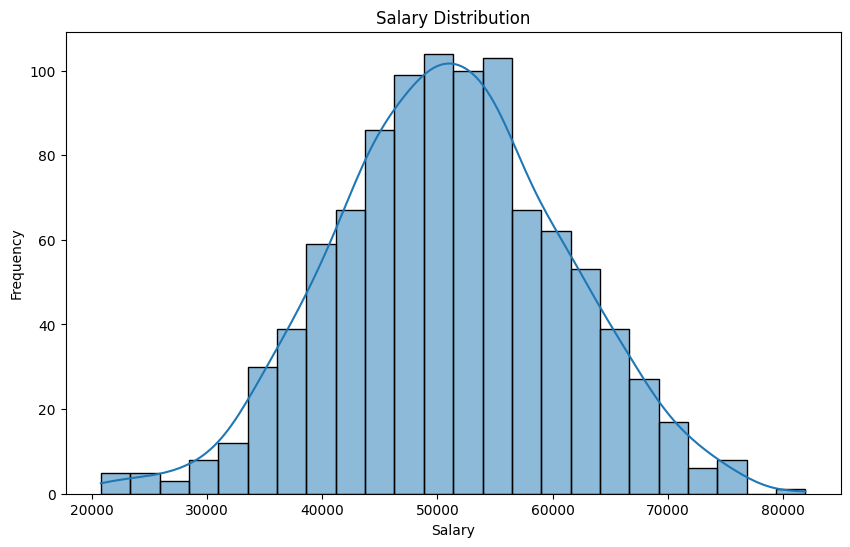

In [ ]:
 # Apply VarianceThreshold
selector = VarianceThreshold(threshold=0.1)
df_selected_array = selector.fit_transform(df)

# Get selected feature names
selected_columns = df.columns[selector.get_support()]     # method returns boolean array use true or false indicate features
df_selected = pd.DataFrame(df_selected_array, columns=selected_columns) # create new data frame for selected features

print("Selected features after VarianceThreshold:")
print(df_selected.head())

# Create histogram for Salary distribution (using df_selected, no outliers removed)
plt.figure(figsize=(10,6))
sns.histplot(df_selected['Income'], kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

[[ 7.88553058e+02 -6.19116428e+00]
 [-1.43424448e+04  5.44522782e+01]
 [ 2.81254988e+03 -7.60834131e+01]
 ...
 [-1.35944499e+03  4.38914198e+01]
 [-5.28244485e+03  6.42797602e+01]
 [-7.91344970e+03 -7.58512892e+01]]


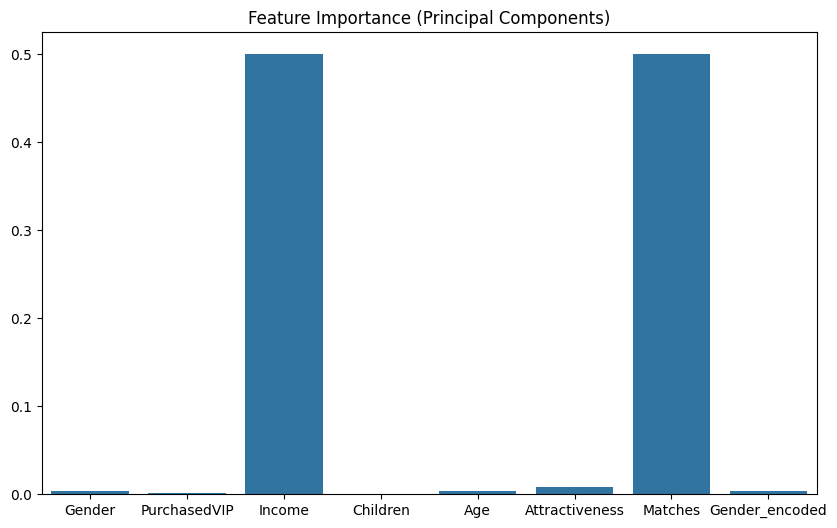

In [ ]:
# ensure all data is numeric for PCA
numeric_df = df.select_dtypes(include=[np.number])

pca = PCA(n_components=2)
df_pca = pca.fit_transform(numeric_df)

print(df_pca)

features =numeric_df.columns.tolist()
importances = np.abs(pca.components_).mean(axis=0)

plt.figure(figsize=(10,6))
sns.barplot(x=features, y=importances)
plt.title('Feature Importance (Principal Components)')
plt.show()